**IMPORT LIBRARIES**

In [ ]:
import pandas as pd
import seaborn as sns
import numpy  as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest,f_classif
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import pickle
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    accuracy_score,
    roc_curve,
    auc,
    confusion_matrix)
from scipy.stats.mstats import winsorize


In [ ]:
import warnings
warnings.filterwarnings('ignore')

**READ** **DATASET**

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/creditscore.csv')
df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


In [ ]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


**CHECKING MISSING VALUES**

In [ ]:
df.isna().sum()

,0
ID,0
Customer_ID,0
Month,0
Name,9985
Age,0
SSN,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,15002
Num_Bank_Accounts,0


In [ ]:
df.shape

(100000, 28)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,84998.0,4194.170850,3183.686167,303.645417,1625.568229,3093.745000,5957.448333,15204.633333
Num_Bank_Accounts,100000.0,17.091280,117.404834,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,100000.0,22.474430,129.057410,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,100000.0,72.466040,466.422621,1.000000,8.000000,13.000000,20.000000,5797.000000
Delay_from_due_date,100000.0,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,98035.0,27.754251,193.177339,0.000000,3.000000,6.000000,9.000000,2597.000000
Credit_Utilization_Ratio,100000.0,32.285173,5.116875,20.000000,28.052567,32.305784,36.496663,50.000000
Total_EMI_per_month,100000.0,1403.118217,8306.041270,0.000000,30.306660,69.249473,161.224249,82331.000000


In [ ]:
df.describe(include="object").T

,count,unique,top,freq
ID,100000,100000,0x25fd5,1
Customer_ID,100000,12500,CUS_0x942c,8
Month,100000,8,January,12500
Name,90015,10139,Stevex,44
Age,100000,1788,38,2833
SSN,100000,12501,#F%$D@*&8,5572
Occupation,100000,16,_______,7062
Annual_Income,100000,18940,36585.12,16
Num_of_Loan,100000,434,3,14386
Type_of_Loan,88592,6260,Not Specified,1408


In [ ]:
df.dtypes

,0
ID,object
Customer_ID,object
Month,object
Name,object
Age,object
SSN,object
Occupation,object
Annual_Income,object
Monthly_Inhand_Salary,float64
Num_Bank_Accounts,int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.isna().sum()[df.isna().sum()>0]

,0
Name,9985
Monthly_Inhand_Salary,15002
Type_of_Loan,11408
Num_of_Delayed_Payment,7002
Num_Credit_Inquiries,1965
Credit_History_Age,9030
Amount_invested_monthly,4479
Monthly_Balance,1200


**DATA PREPROCESSING**

**NAME**

In [ ]:
df['Name'].head(10)

,Name
0,Aaron Maashoh
1,Aaron Maashoh
2,Aaron Maashoh
3,Aaron Maashoh
4,Aaron Maashoh
5,Aaron Maashoh
6,Aaron Maashoh
7,NaN
8,Rick Rothackerj
9,Rick Rothackerj


In [ ]:
df["Name"]=df["Name"].fillna(df["Name"].mode()[0])

**AGE**

In [ ]:
df["Age"].unique()

array(['23', '-500', '28_', ..., '4808_', '2263', '1342'], dtype=object)

In [ ]:
df['Age']=df['Age'].str.replace(' ','').str.replace('-','').str.replace('_','')
df['Age']=pd.to_numeric(df['Age'],errors='coerce',downcast="integer")
df["Age"]=df["Age"].fillna(df["Age"].mode()[0])
df["Age"].dtype

dtype('int16')

In [ ]:
df[df["Age"]>100]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
2,0x1604,CUS_0xd40,March,Aaron Maashoh,500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
56,0x1656,CUS_0x5407,January,Annk,7580,500-92-6408,Media_Manager,34081.38_,NaN,8,...,Standard,1704.18,24.448063,NaN,NM,70.478333,162.4410091967751,Low_spent_Large_value_payments,298.19215813115227,Poor
113,0x16ab,CUS_0xff4,February,Langep,500,655-05-7666,Entrepreneur,25546.26,NaN,8,...,Standard,758.44,29.711376,18 Years and 3 Months,Yes,101.328637,300.32323168069064,Low_spent_Small_value_payments,129.9336309554582,Standard
122,0x16b8,CUS_0x33d2,March,Chalmersa,181,965-46-2491,Scientist,31993.78,2942.148333,6,...,Standard,818.22,27.380109,17 Years and 0 Months,Yes,45.141298,264.25708850339777,Low_spent_Small_value_payments,274.8164466052998,Standard
219,0x1749,CUS_0x3edc,April,Williamso,995,663-16-3845,Accountant,43070.24,3622.186667,3,...,Standard,1233.1,24.331772,19 Years and 5 Months,Yes,30.576085,74.92037487328841,High_spent_Medium_value_payments,506.7222069702167,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99913,0x25f6f,CUS_0x1619,February,Phil Wahbao,2263,683-59-7399,Media_Manager,20059.98,1523.665000,8,...,Good,909.01,25.982154,16 Years and 4 Months,No,45.076827,74.71358019803843,High_spent_Small_value_payments,292.576093,Poor
99937,0x25f93,CUS_0xad4f,February,Sabina Zawadzkig,500,226-45-0652,_______,22620.79,1722.065833,7,...,Standard,642.46,31.841872,NaN,No,0.000000,105.07629339039072,Low_spent_Large_value_payments,337.13029,Standard
99950,0x25fa4,CUS_0x51b3,July,Ryana,1342,837-85-9800,Media_Manager,59146.36,4908.863333,3,...,_,418.03,38.199635,20 Years and 7 Months,No,26.778419,502.3763201756033,Low_spent_Small_value_payments,251.731594,Standard
99963,0x25fb9,CUS_0x372c,April,Lucia Mutikanik,500,340-85-7301,Lawyer,42903.79,NaN,0,...,Good,1079.48,30.625298,NaN,No,34.975457,31.19391926667726,High_spent_Large_value_payments,520.662207,Standard


In [ ]:
df.drop(df[df["Age"]>100].index,inplace=True)

In [ ]:
df["Age"].isna().sum()

np.int64(0)

**OCCUPATION**

In [ ]:
df["Occupation"].head(10)

,Occupation
0,Scientist
1,Scientist
3,Scientist
4,Scientist
5,Scientist
6,Scientist
7,Scientist
8,_______
9,Teacher
10,Teacher


In [ ]:
df["Occupation"]=df["Occupation"].str.replace("_______" ,"Other")

In [ ]:
df['Occupation'].isna().sum()

np.int64(0)

In [ ]:
df['Occupation'].head(10)

,Occupation
0,Scientist
1,Scientist
3,Scientist
4,Scientist
5,Scientist
6,Scientist
7,Scientist
8,Other
9,Teacher
10,Teacher


**ANNUAL INCOME**

In [ ]:
df["Annual_Income"].head(10)

,Annual_Income
0,19114.12
1,19114.12
3,19114.12
4,19114.12
5,19114.12
6,19114.12
7,19114.12
8,34847.84
9,34847.84
10,34847.84_


In [ ]:
df["Annual_Income"]=df["Annual_Income"].str.replace("_","").astype("float")

In [ ]:
df["Annual_Income"].head(10)

,Annual_Income
0,19114.12
1,19114.12
3,19114.12
4,19114.12
5,19114.12
6,19114.12
7,19114.12
8,34847.84
9,34847.84
10,34847.84


**MONTHLY INHAND SALARY**

In [ ]:
df["Monthly_Inhand_Salary"].head()

,Monthly_Inhand_Salary
0,1824.843333
1,NaN
3,NaN
4,1824.843333
5,NaN


In [ ]:
df["Monthly_Inhand_Salary"]=df["Monthly_Inhand_Salary"].fillna(df["Annual_Income"]/12)

In [ ]:
df["Monthly_Inhand_Salary"].isna().sum()

np.int64(0)

In [ ]:
df["Monthly_Inhand_Salary"]

,Monthly_Inhand_Salary
0,1824.843333
1,1592.843333
3,1592.843333
4,1824.843333
5,1592.843333
...,...
99995,3359.415833
99996,3359.415833
99997,3359.415833
99998,3359.415833


**NUM OF LOAN**

In [ ]:
df["Num_of_Loan"].head(5)

,Num_of_Loan
0,4
1,4
3,4
4,4
5,4


In [ ]:
df["Num_of_Loan"].unique()

array(['4', '1', '3', '967', '-100', '0', '0_', '2', '3_', '2_', '7', '5',
       '5_', '6', '8', '8_', '9', '9_', '4_', '7_', '1_', '1464', '6_',
       '622', '352', '1017', '945', '146', '563', '341', '720', '1485',
       '49', '737', '1106', '466', '728', '313', '597_', '119', '663',
       '640', '92_', '1019', '501', '1302', '39', '716', '848', '931',
       '1214', '186', '424', '1001', '1110', '1152', '457', '1433',
       '1187', '52', '1480', '1047', '1035', '1347_', '33', '193', '699',
       '329', '1451', '484', '649', '995', '545', '684', '1135', '1094',
       '1204', '654', '58', '348', '614', '1363', '323', '1406', '1348',
       '430', '153', '1461', '905', '1312', '1424', '1154', '95', '1353',
       '1228', '819', '1006', '795', '359', '1209', '590', '696', '1185_',
       '1465', '911', '70', '816', '1369', '143', '1416', '455', '55',
       '1096', '1474', '420', '904', '89', '1259', '527', '1241', '449',
       '983', '418', '319', '23', '238', '638', '138', '23

In [ ]:
df["Num_of_Loan"] = pd.to_numeric(df["Num_of_Loan"].str.replace("_", "").str.replace("-", ""), errors='coerce').astype("Int64")

**TYPE OF LOAN**

In [ ]:
df["Type_of_Loan"].head(10)

,Type_of_Loan
0,"Auto Loan, Credit-Builder Loan, Personal Loan,..."
1,"Auto Loan, Credit-Builder Loan, Personal Loan,..."
3,"Auto Loan, Credit-Builder Loan, Personal Loan,..."
4,"Auto Loan, Credit-Builder Loan, Personal Loan,..."
5,"Auto Loan, Credit-Builder Loan, Personal Loan,..."
6,"Auto Loan, Credit-Builder Loan, Personal Loan,..."
7,"Auto Loan, Credit-Builder Loan, Personal Loan,..."
8,Credit-Builder Loan
9,Credit-Builder Loan
10,Credit-Builder Loan


In [ ]:
df["Type_of_Loan"].unique()

array(['Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
       'Credit-Builder Loan', 'Auto Loan, Auto Loan, and Not Specified',
       ..., 'Home Equity Loan, Auto Loan, Auto Loan, and Auto Loan',
       'Payday Loan, Student Loan, Mortgage Loan, and Not Specified',
       'Personal Loan, Auto Loan, Mortgage Loan, Student Loan, and Student Loan'],
      dtype=object)

In [ ]:
df["Type_of_Loan"].isna().sum()

np.int64(11076)

In [ ]:
df["Type_of_Loan"]=df["Type_of_Loan"].fillna(df["Type_of_Loan"].mode()[0])

**NUM OF DELAYED PAYMENT**

In [ ]:
df["Num_of_Delayed_Payment"].head(10)

,Num_of_Delayed_Payment
0,7
1,NaN
3,4
4,NaN
5,4
6,8_
7,6
8,4
9,1
10,-1


In [ ]:
df["Num_of_Delayed_Payment"]=df["Num_of_Delayed_Payment"].str.replace("_","").str.replace("-","")

In [ ]:
df["Num_of_Delayed_Payment"].isna().sum()

np.int64(6824)

In [ ]:
df["Num_of_Delayed_Payment"]=df["Num_of_Delayed_Payment"].fillna(df["Num_of_Delayed_Payment"].mode()[0])

In [ ]:
df['Num_of_Delayed_Payment'].isna().sum()

np.int64(0)

**CHANGED CREDIT LIMIT**

In [ ]:
df["Changed_Credit_Limit"].head()

,Changed_Credit_Limit
0,11.27
1,11.27
3,6.27
4,11.27
5,9.27


In [ ]:
df["Changed_Credit_Limit"]=df["Changed_Credit_Limit"].str.replace("_","").str.replace("-","")

In [ ]:
df['Changed_Credit_Limit']=pd.to_numeric(df['Changed_Credit_Limit'],errors='coerce')

In [ ]:
df["Changed_Credit_Limit"]=df["Changed_Credit_Limit"].fillna(df["Changed_Credit_Limit"].mean())

**NUM CREDIT INQUIRIES**

In [ ]:
df["Num_Credit_Inquiries"].head()

,Num_Credit_Inquiries
0,4.0
1,4.0
3,4.0
4,4.0
5,4.0


In [ ]:
df["Num_Credit_Inquiries"].isna().sum()

np.int64(1906)

In [ ]:
df["Num_Credit_Inquiries"]=df["Num_Credit_Inquiries"].fillna(df["Num_Credit_Inquiries"].mode()[0])

**CREDIT MIX**

In [ ]:
df["Credit_Mix"].head()

,Credit_Mix
0,_
1,Good
3,Good
4,Good
5,Good


In [ ]:
df["Credit_Mix"].unique()

array(['_', 'Good', 'Standard', 'Bad'], dtype=object)

In [ ]:
df["Credit_Mix"].value_counts()

,count
Credit_Mix,
Standard,35517
Good,23614
_,19633
Bad,18460


In [ ]:
df.loc[df["Credit_Mix"] == "_", "Credit_Mix"] = pd.NA
df["Credit_Mix"]=df['Credit_Mix'].fillna(df["Credit_Mix"].mode()[0])

In [ ]:
df['Credit_Mix'].isna().sum()

np.int64(0)

**OUTSTANDING DEBT**

In [ ]:
df["Outstanding_Debt"].value_counts()

,count
Outstanding_Debt,
1151.7,23
1360.45,22
1109.03,22
460.46,20
687.87,16
...,...
105.89_,1
153.48_,1
2618.46_,1


In [ ]:
df["Outstanding_Debt"]=df["Outstanding_Debt"].str.replace("_","").astype("float")

**CREDIT HISTORY AGE**

In [ ]:
df["Credit_History_Age"].head()

,Credit_History_Age
0,22 Years and 1 Months
1,NaN
3,22 Years and 4 Months
4,22 Years and 5 Months
5,22 Years and 6 Months


In [ ]:
df["Credit_History_Age"].value_counts()

,count
Credit_History_Age,
15 Years and 11 Months,435
15 Years and 9 Months,428
17 Years and 11 Months,428
19 Years and 3 Months,427
19 Years and 5 Months,425
...,...
0 Years and 3 Months,19
33 Years and 7 Months,14
0 Years and 2 Months,14


In [ ]:
def years_and_months_to_months(age):
    if type(age)==str:
        age_parts=age.split(' Years and ')
        years=int(age_parts[0]) if 'Years' in age else 0
        months_str=age_parts[1].split(' Months')[0] if 'Months' in age_parts[1] else '0'
        months=int(months_str)
        total_months=years*12+months
        return total_months
    else:
        return 0

In [ ]:
df['Credit_History_Age_Months']=df['Credit_History_Age'].apply(years_and_months_to_months)

In [ ]:
df.drop(columns=['Credit_History_Age'],inplace=True)

In [ ]:
df["Credit_History_Age_Months"].head()

,Credit_History_Age_Months
0,265
1,0
3,268
4,269
5,270


**PAYMENT OF MIN AMOUNT**

In [ ]:
df["Payment_of_Min_Amount"].head()

,Payment_of_Min_Amount
0,No
1,No
3,No
4,No
5,No


In [ ]:
df["Payment_of_Min_Amount"].value_counts()

,count
Payment_of_Min_Amount,
Yes,50911
No,34647
NM,11666


In [ ]:
df['Payment_of_Min_Amount']=df['Payment_of_Min_Amount'].apply(lambda x:'No'if x=='NM' else x)

In [ ]:
df["Payment_of_Min_Amount"].value_counts()

,count
Payment_of_Min_Amount,
Yes,50911
No,46313


**TOTAL EMI PER MONTH**

In [ ]:
df["Total_EMI_per_month"].head()

,Total_EMI_per_month
0,49.574949
1,49.574949
3,49.574949
4,49.574949
5,49.574949


In [ ]:
df["Total_EMI_per_month"].isna().sum()

np.int64(0)

In [ ]:
df["Amount_invested_monthly"].head(20)

,Amount_invested_monthly
0,80.41529543900253
1,118.28022162236736
3,199.4580743910713
4,41.420153086217326
5,62.430172331195294
6,178.3440674122349
7,24.785216509052056
8,104.291825168246
9,40.39123782853101
10,58.51597569589465


In [ ]:
df["Amount_invested_monthly"]=df["Amount_invested_monthly"].str.replace("_","").astype("float")
df["Amount_invested_monthly"]=df["Amount_invested_monthly"].fillna(df["Amount_invested_monthly"].mean())

**PAYMENT BEHAVIOUR**

In [ ]:
df["Payment_Behaviour"].head()

,Payment_Behaviour
0,High_spent_Small_value_payments
1,Low_spent_Large_value_payments
3,Low_spent_Small_value_payments
4,High_spent_Medium_value_payments
5,!@9#%8


In [ ]:
df["Payment_Behaviour"]=df["Payment_Behaviour"].replace("!@9#%8",np.nan)

In [ ]:
df['Payment_Behaviour'].isna().sum()

np.int64(7377)

In [ ]:
df["Payment_Behaviour"]=df["Payment_Behaviour"].fillna(df["Payment_Behaviour"].mode()[0])

**MONTHLY BALANCE**

In [ ]:
df["Monthly_Balance"]=df["Monthly_Balance"].str.replace(r'[^0-9.-]+','').str.replace('_','').str.replace('-','')
df['Monthly_Balance']=df['Monthly_Balance'].astype(float)
df["Monthly_Balance"]=df["Monthly_Balance"].fillna(df["Monthly_Balance"].mean())

In [ ]:
df.isna().sum()

,0
ID,0
Customer_ID,0
Month,0
Name,0
Age,0
SSN,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,0
Num_Bank_Accounts,0


In [ ]:
df.dtypes

,0
ID,object
Customer_ID,object
Month,object
Name,object
Age,int16
SSN,object
Occupation,object
Annual_Income,float64
Monthly_Inhand_Salary,float64
Num_Bank_Accounts,int64


In [ ]:
a=df["Age"].astype("int")

**OUTLIERS DETECTION AND REMOVAL USING WINSORIZE**

In [ ]:
df_numeric = df.select_dtypes(include=['float64', 'int64','int'])

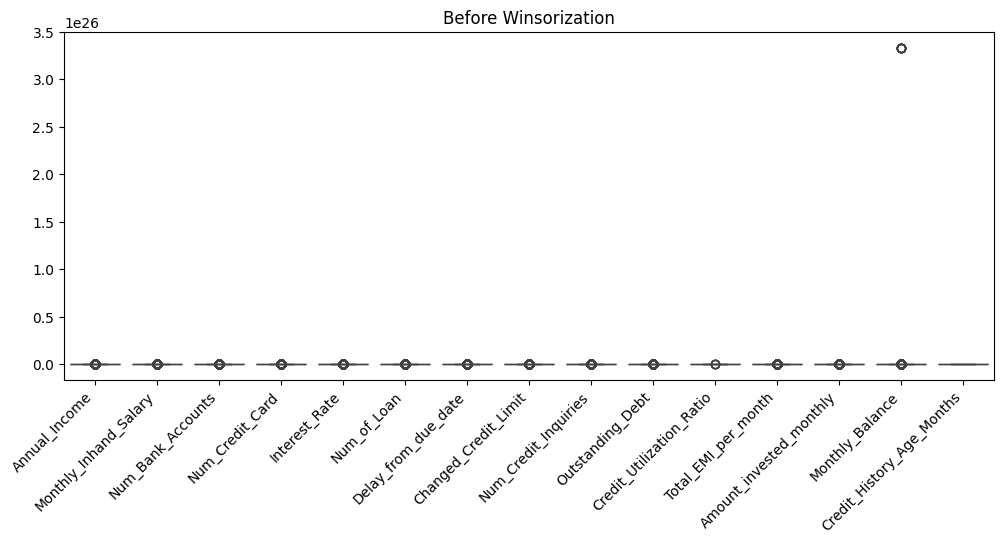

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_numeric)
plt.title('Before Winsorization')

# 🔹 Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# 🔹 Increase space between labels
plt.gcf().subplots_adjust(bottom=0.3)  # Adjust bottom margin

plt.show()

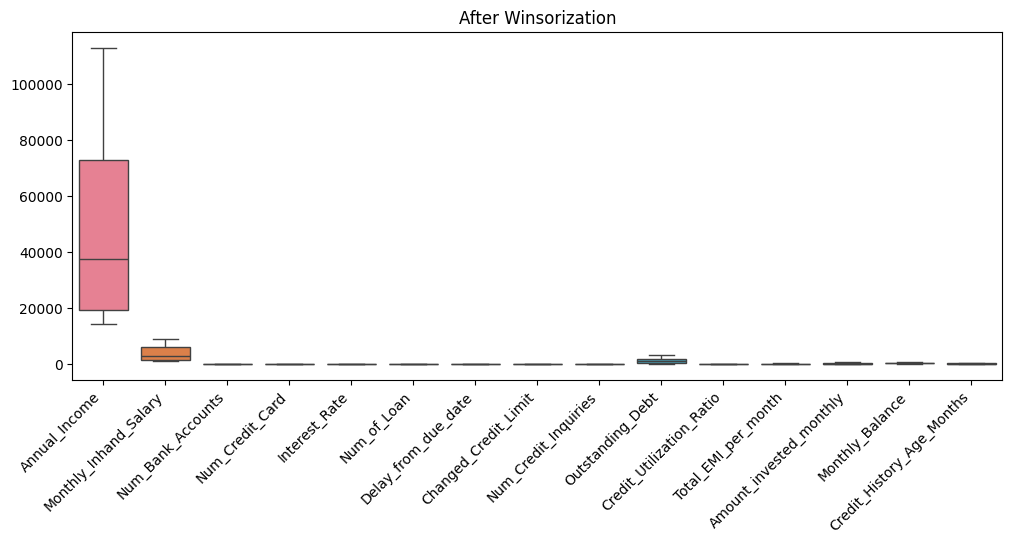

In [ ]:
# List of columns to Winsorize
cols = ['Annual_Income','Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
        'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Changed_Credit_Limit',
        'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month',
        'Amount_invested_monthly', 'Monthly_Balance', 'Credit_History_Age_Months']

# Apply Winsorization column-wise after converting to float
for col in cols:
    df_numeric[col] = winsorize(df_numeric[col].astype(float), limits=[0.1, 0.1])

# Plot after Winsorization
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_numeric)
plt.title('After Winsorization')
plt.xticks(rotation=45, ha='right')
plt.gcf().subplots_adjust(bottom=0.3)  # Adjust bottom margin
plt.show()


In [ ]:
df_non_numeric=df.select_dtypes(exclude=['number'])
df_combined=pd.concat([df_numeric,df_non_numeric],axis=1)
df=df_combined.copy()
df

,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,...,Month,Name,SSN,Occupation,Type_of_Loan,Num_of_Delayed_Payment,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
0,19114.12,1824.843333,3.0,4.0,4.0,4.0,5.0,11.27,4.0,809.98,...,January,Aaron Maashoh,821-00-0265,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",7,Standard,No,High_spent_Small_value_payments,Good
1,19114.12,1592.843333,3.0,4.0,4.0,4.0,5.0,11.27,4.0,809.98,...,February,Aaron Maashoh,821-00-0265,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",19,Good,No,Low_spent_Large_value_payments,Good
3,19114.12,1592.843333,3.0,4.0,4.0,4.0,5.0,6.27,4.0,809.98,...,April,Aaron Maashoh,821-00-0265,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",4,Good,No,Low_spent_Small_value_payments,Good
4,19114.12,1824.843333,3.0,4.0,4.0,4.0,6.0,11.27,4.0,809.98,...,May,Aaron Maashoh,821-00-0265,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",19,Good,No,High_spent_Medium_value_payments,Good
5,19114.12,1592.843333,3.0,4.0,4.0,4.0,8.0,9.27,4.0,809.98,...,June,Aaron Maashoh,821-00-0265,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",4,Good,No,Low_spent_Small_value_payments,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,39628.99,3359.415833,4.0,6.0,7.0,2.0,23.0,11.50,3.0,502.38,...,April,Nicks,078-73-5990,Mechanic,"Auto Loan, and Student Loan",7,Standard,No,High_spent_Large_value_payments,Poor
99996,39628.99,3359.415833,4.0,6.0,7.0,2.0,18.0,11.50,3.0,502.38,...,May,Nicks,078-73-5990,Mechanic,"Auto Loan, and Student Loan",7,Standard,No,High_spent_Medium_value_payments,Poor
99997,39628.99,3359.415833,4.0,6.0,29.0,2.0,27.0,11.50,3.0,502.38,...,June,Nicks,078-73-5990,Mechanic,"Auto Loan, and Student Loan",6,Good,No,High_spent_Large_value_payments,Poor
99998,39628.99,3359.415833,4.0,6.0,7.0,2.0,20.0,11.50,3.0,502.38,...,July,Nicks,078-73-5990,Mechanic,"Auto Loan, and Student Loan",19,Good,No,Low_spent_Large_value_payments,Standard


In [ ]:
df.dtypes

,0
Annual_Income,float64
Monthly_Inhand_Salary,float64
Num_Bank_Accounts,float64
Num_Credit_Card,float64
Interest_Rate,float64
Num_of_Loan,float64
Delay_from_due_date,float64
Changed_Credit_Limit,float64
Num_Credit_Inquiries,float64
Outstanding_Debt,float64


In [ ]:
df.insert(0, "Age", a)
df

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Changed_Credit_Limit,Num_Credit_Inquiries,...,Month,Name,SSN,Occupation,Type_of_Loan,Num_of_Delayed_Payment,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
0,23,19114.12,1824.843333,3.0,4.0,4.0,4.0,5.0,11.27,4.0,...,January,Aaron Maashoh,821-00-0265,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",7,Standard,No,High_spent_Small_value_payments,Good
1,23,19114.12,1592.843333,3.0,4.0,4.0,4.0,5.0,11.27,4.0,...,February,Aaron Maashoh,821-00-0265,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",19,Good,No,Low_spent_Large_value_payments,Good
3,23,19114.12,1592.843333,3.0,4.0,4.0,4.0,5.0,6.27,4.0,...,April,Aaron Maashoh,821-00-0265,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",4,Good,No,Low_spent_Small_value_payments,Good
4,23,19114.12,1824.843333,3.0,4.0,4.0,4.0,6.0,11.27,4.0,...,May,Aaron Maashoh,821-00-0265,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",19,Good,No,High_spent_Medium_value_payments,Good
5,23,19114.12,1592.843333,3.0,4.0,4.0,4.0,8.0,9.27,4.0,...,June,Aaron Maashoh,821-00-0265,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",4,Good,No,Low_spent_Small_value_payments,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25,39628.99,3359.415833,4.0,6.0,7.0,2.0,23.0,11.50,3.0,...,April,Nicks,078-73-5990,Mechanic,"Auto Loan, and Student Loan",7,Standard,No,High_spent_Large_value_payments,Poor
99996,25,39628.99,3359.415833,4.0,6.0,7.0,2.0,18.0,11.50,3.0,...,May,Nicks,078-73-5990,Mechanic,"Auto Loan, and Student Loan",7,Standard,No,High_spent_Medium_value_payments,Poor
99997,25,39628.99,3359.415833,4.0,6.0,29.0,2.0,27.0,11.50,3.0,...,June,Nicks,078-73-5990,Mechanic,"Auto Loan, and Student Loan",6,Good,No,High_spent_Large_value_payments,Poor
99998,25,39628.99,3359.415833,4.0,6.0,7.0,2.0,20.0,11.50,3.0,...,July,Nicks,078-73-5990,Mechanic,"Auto Loan, and Student Loan",19,Good,No,Low_spent_Large_value_payments,Standard


In [ ]:
cols=['Credit_History_Age_Months','Delay_from_due_date','Num_of_Loan','Interest_Rate','Interest_Rate','Num_Bank_Accounts','Age']
for col in cols:
  df[col]=df[col].astype(int)
df.dtypes

,0
Age,int64
Annual_Income,float64
Monthly_Inhand_Salary,float64
Num_Bank_Accounts,int64
Num_Credit_Card,float64
Interest_Rate,int64
Num_of_Loan,int64
Delay_from_due_date,int64
Changed_Credit_Limit,float64
Num_Credit_Inquiries,float64


**EDA**

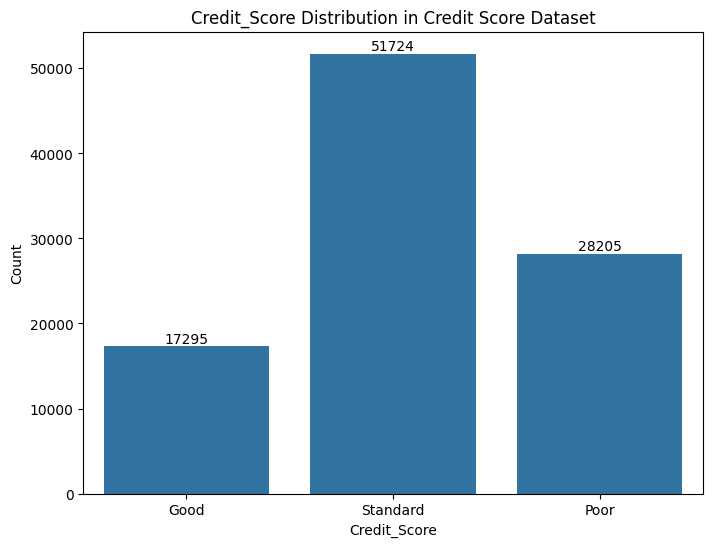

In [ ]:
plt.figure(figsize=(8, 6))
ax=sns.countplot(data=df, x='Credit_Score')
ax.bar_label(ax.containers[0])
plt.title('Credit_Score Distribution in Credit Score Dataset')
plt.xlabel('Credit_Score')
plt.ylabel('Count')
plt.show()

Imbalanced Distribution:

The "Standard" category has the highest number of records (51,724).
The "Poor" category is the second highest with 28,205 records.
The "Good" category has the least number of records (17,295).
Dataset Representation:

The dataset consists mostly of "Standard" and "Poor" credit scores, which may indicate that fewer individuals have an excellent credit score.

In [ ]:
df = df.drop(["ID", "Customer_ID", "Name", "SSN", "Type_of_Loan", "Month"],
             axis=1)

df.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Changed_Credit_Limit,Num_Credit_Inquiries,...,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_History_Age_Months,Occupation,Num_of_Delayed_Payment,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
0,23,19114.12,1824.843333,3,4.0,4,4,5,11.27,4.0,...,49.574949,80.415295,312.494089,265,Scientist,7,Standard,No,High_spent_Small_value_payments,Good
1,23,19114.12,1592.843333,3,4.0,4,4,5,11.27,4.0,...,49.574949,118.280222,284.629162,17,Scientist,19,Good,No,Low_spent_Large_value_payments,Good
3,23,19114.12,1592.843333,3,4.0,4,4,5,6.27,4.0,...,49.574949,199.458074,223.451310,268,Scientist,4,Good,No,Low_spent_Small_value_payments,Good
4,23,19114.12,1824.843333,3,4.0,4,4,6,11.27,4.0,...,49.574949,44.891546,341.489231,269,Scientist,19,Good,No,High_spent_Medium_value_payments,Good
5,23,19114.12,1592.843333,3,4.0,4,4,8,9.27,4.0,...,49.574949,62.430172,340.479212,270,Scientist,4,Good,No,Low_spent_Small_value_payments,Good


In [ ]:
df.to_csv("CreditScoreClassification_cleaned.csv", index=False)

In [ ]:
df = pd.read_csv("CreditScoreClassification_cleaned.csv")
df.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Changed_Credit_Limit,Num_Credit_Inquiries,...,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_History_Age_Months,Occupation,Num_of_Delayed_Payment,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
0,23,19114.12,1824.843333,3,4.0,4,4,5,11.27,4.0,...,49.574949,80.415295,312.494089,265,Scientist,7,Standard,No,High_spent_Small_value_payments,Good
1,23,19114.12,1592.843333,3,4.0,4,4,5,11.27,4.0,...,49.574949,118.280222,284.629162,17,Scientist,19,Good,No,Low_spent_Large_value_payments,Good
2,23,19114.12,1592.843333,3,4.0,4,4,5,6.27,4.0,...,49.574949,199.458074,223.451310,268,Scientist,4,Good,No,Low_spent_Small_value_payments,Good
3,23,19114.12,1824.843333,3,4.0,4,4,6,11.27,4.0,...,49.574949,44.891546,341.489231,269,Scientist,19,Good,No,High_spent_Medium_value_payments,Good
4,23,19114.12,1592.843333,3,4.0,4,4,8,9.27,4.0,...,49.574949,62.430172,340.479212,270,Scientist,4,Good,No,Low_spent_Small_value_payments,Good


In [ ]:
df.isna().sum()

,0
Age,0
Annual_Income,0
Monthly_Inhand_Salary,0
Num_Bank_Accounts,0
Num_Credit_Card,0
Interest_Rate,0
Num_of_Loan,0
Delay_from_due_date,0
Changed_Credit_Limit,0
Num_Credit_Inquiries,0


In [ ]:
df.shape

(97224, 22)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97224 entries, 0 to 97223
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        97224 non-null  int64  
 1   Annual_Income              97224 non-null  float64
 2   Monthly_Inhand_Salary      97224 non-null  float64
 3   Num_Bank_Accounts          97224 non-null  int64  
 4   Num_Credit_Card            97224 non-null  float64
 5   Interest_Rate              97224 non-null  int64  
 6   Num_of_Loan                97224 non-null  int64  
 7   Delay_from_due_date        97224 non-null  int64  
 8   Changed_Credit_Limit       97224 non-null  float64
 9   Num_Credit_Inquiries       97224 non-null  float64
 10  Outstanding_Debt           97224 non-null  float64
 11  Credit_Utilization_Ratio   97224 non-null  float64
 12  Total_EMI_per_month        97224 non-null  float64
 13  Amount_invested_monthly    97224 non-null  flo

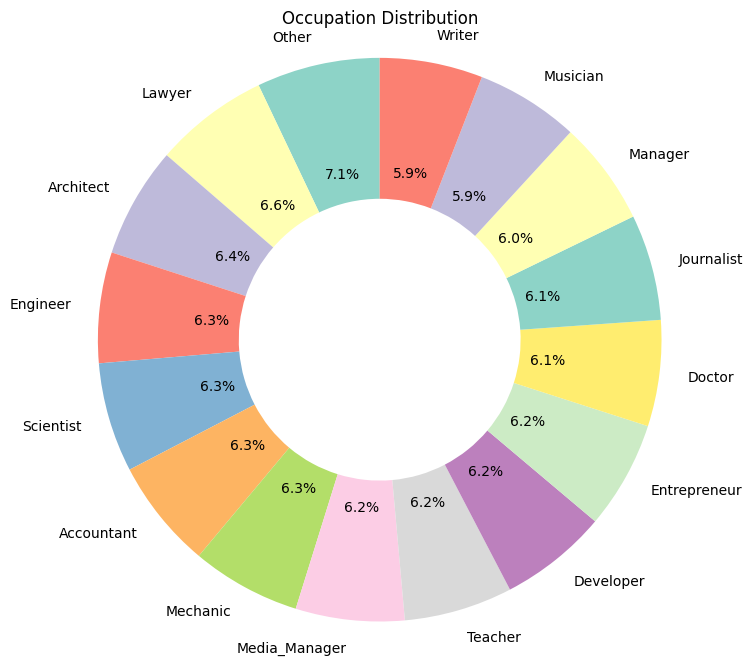

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(df["Occupation"].value_counts(),
        labels=df["Occupation"].value_counts().index,
        autopct='%1.1f%%',
        startangle=90,
        colors=plt.cm.Set3.colors,
        wedgeprops=dict(width=0.5))
plt.title("Occupation Distribution")
plt.axis('equal')
plt.show()

Relatively Even Distribution:

The occupations are fairly evenly distributed, with no single category overwhelmingly dominating the dataset.
The percentages range between 5.9% and 7.1%, showing a balanced representation across different professions.
Most Common Occupation:

The "Other" category has the highest proportion (7.1%), indicating that a significant number of individuals do not fit into the predefined occupations.
Least Common Occupations:

The "Writer" and "Musician" categories have the lowest representation (5.9% each).
This might indicate that these professions are less common in the dataset.

Potential Impact on Credit Score Prediction:

Since no occupation is overwhelmingly dominant, the occupation feature may not be a heavily biased factor in credit score prediction.
However, if certain occupations are more correlated with specific credit score categories, this feature could still be useful for modeling.


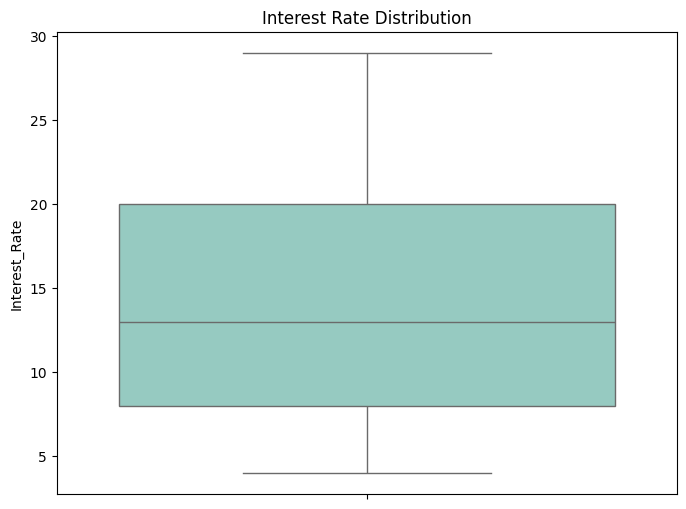

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y="Interest_Rate", palette="Set3")
plt.title("Interest Rate Distribution")
plt.show()

Spread of Interest Rates:

The minimum interest rate is around 4%, while the maximum is around 30%.
The interquartile range (IQR) (25th to 75th percentile) spans from about 7% to 22%.
Median Interest Rate:

The median (50th percentile) appears to be around 13-14%, indicating that half of the values are below this threshold.
No Significant Outliers:

There are no extreme outliers visible beyond the whiskers, suggesting that the data does not have extreme deviations from the typical range.
Skewness and Distribution:

The plot suggests a relatively balanced distribution with no heavy skewness.
If the whiskers were unequal or if outliers were present, it would indicate a skewed distribution.
Implications for Credit Score Prediction:

Interest Rate could be a key factor in determining creditworthiness.
Individuals with higher interest rates might have lower credit scores, as higher rates could indicate greater lending risk.

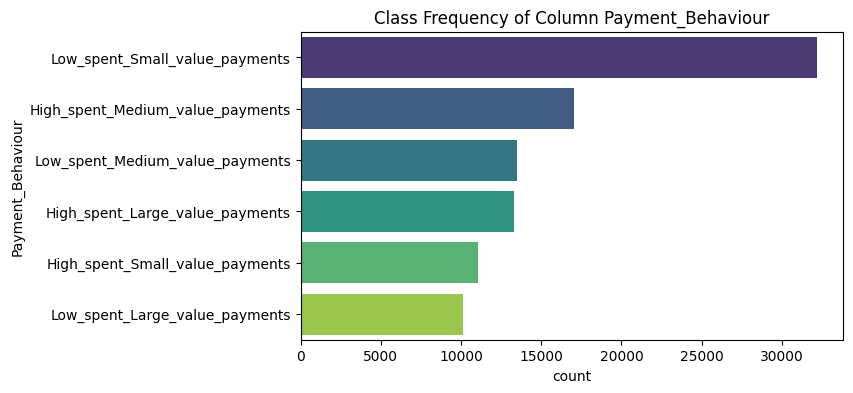

In [ ]:
plt.figure(figsize=(7, 4))
sns.countplot(y="Payment_Behaviour", data=df, palette="viridis", order=df["Payment_Behaviour"].value_counts().index)
plt.title(f"Class Frequency of Column Payment_Behaviour")
plt.show()

Most Common Payment Behavior

1.The "Low_spent_Small_value_payments" category is the most frequent, with over 30,000 instances.
This suggests that a significant portion of the dataset consists of individuals who make low spending and small value payments.
2. Medium and Large Value Payments
"High_spent_Medium_value_payments" and "Low_spent_Medium_value_payments" are the next most common behaviors.
This indicates a balanced mix of spending habits within the dataset.
3. Less Frequent Payment Behaviors
"High_spent_Small_value_payments" and "Low_spent_Large_value_payments" have the lowest counts.
This suggests that high spenders making only small payments and low spenders making large payments are rare.
4. Possible Impact on Credit Scores
Low spenders with small payments might be associated with Standard or Poor credit scores due to limited credit activity.
High spenders making large payments may indicate better financial stability and a Good credit score.

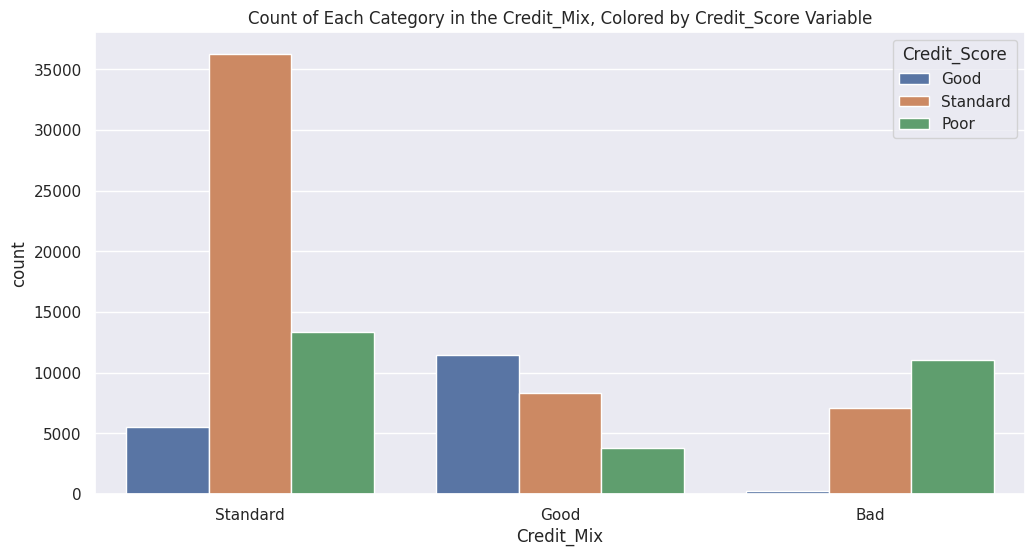

In [ ]:
sns.set(style="darkgrid")
plt.figure(figsize=(12, 6))
sns.countplot(x='Credit_Mix', hue='Credit_Score', data=df)
plt.title('Count of Each Category in the Credit_Mix, Colored by Credit_Score Variable')
plt.show()

Majority of Customers Have a Standard Credit Mix

The "Standard" credit mix category dominates the dataset, with over 35,000 instances.
Most of these customers have a Standard credit score, with smaller portions classified as Good or Poor.
Good Credit Score is Associated with a "Good" Credit Mix

Customers with a "Good" Credit Mix have a higher proportion of Good Credit Scores.
This aligns with the expectation that a diverse and well-managed credit mix contributes positively to credit scores.
"Poor" Credit Mix is Linked to Bad Credit Scores

Individuals classified under the "Bad" Credit Mix category have a significantly higher proportion of Poor Credit Scores.
This suggests that an unbalanced or poorly managed credit mix is a strong indicator of low creditworthiness.
Some Standard and Poor Credit Scores Exist in Good Credit Mix

While a Good Credit Mix is generally associated with a Good Credit Score, some individuals in this category still have Standard or Poor scores.
This could indicate that other factors like late payments, high credit utilization, or low income may be affecting their scores.

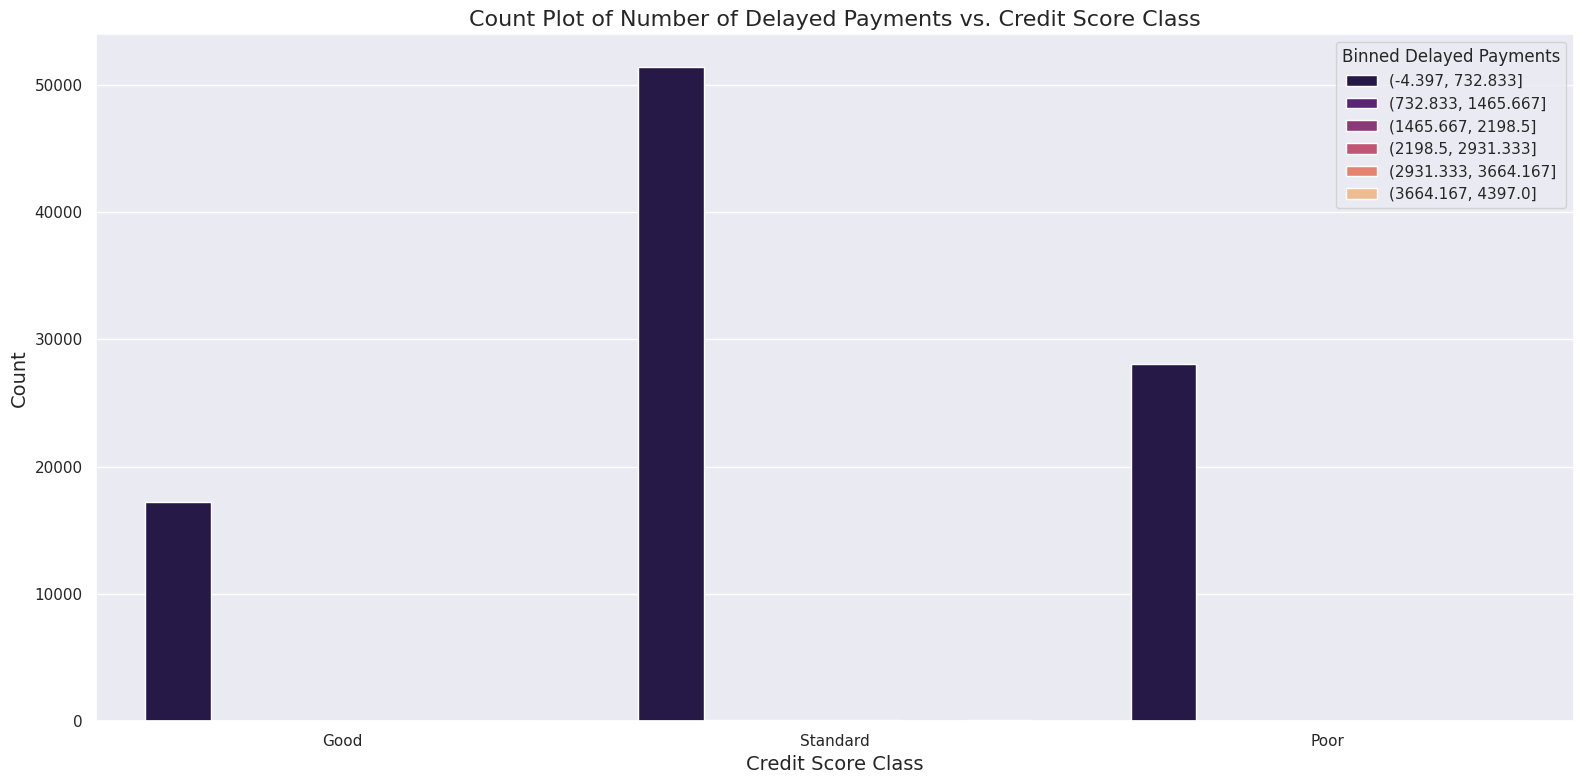

In [ ]:
plt.figure(figsize=(16, 8))  # Adjust width and height as needed

df['Delayed_Payment_Binned'] = pd.cut(df['Num_of_Delayed_Payment'], bins=6)

sns.countplot(
    data=df,
    x='Credit_Score',
    hue='Delayed_Payment_Binned',
    palette='magma'
)

plt.title('Count Plot of Number of Delayed Payments vs. Credit Score Class', fontsize=16)
plt.xlabel('Credit Score Class', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Binned Delayed Payments')
plt.tight_layout()
plt.show()


Delayed Payments Are More Common Among Standard & Poor Credit Scores

Customers with a Standard or Poor Credit Score tend to have higher numbers of delayed payments.
This aligns with the expectation that late payments negatively impact credit scores.
Good Credit Score Individuals Have Fewer Delayed Payments

The density of delayed payments is significantly lower for the Good Credit Score group.
This suggests that timely payments contribute positively to maintaining a high credit score.
Highly Skewed Distribution

The plot appears heavily concentrated around a few values, indicating that most individuals fall into specific ranges of delayed payments.
This could mean that most individuals either consistently pay on time or have frequent delays.
Possible Issue with Visualization Scaling

The plot seems stretched horizontally, making it difficult to see granular differences in the number of delayed payments across credit scores.



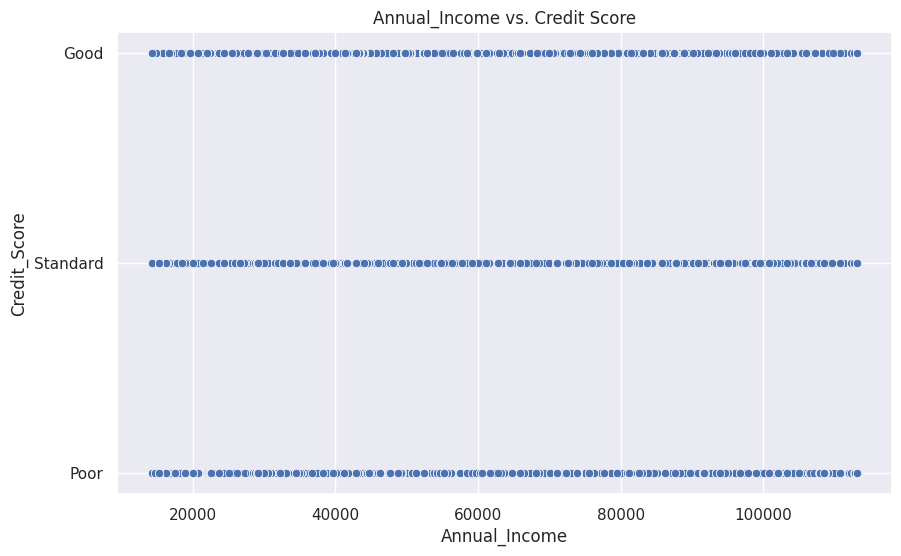

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual_Income', y='Credit_Score', data=df)

plt.title('Annual_Income vs. Credit Score')
plt.show()

Annual Income is Spread Across All Credit Score Categories

There is no strict separation between income levels and credit score classes.
Individuals across all credit score categories have incomes spanning from low (10,000-20,000) to high (100,000+).
Higher Incomes are More Common in the "Good" Credit Score Category

The Good credit score category shows a denser spread across all income levels, especially at the higher end (60,000+).
This suggests that higher incomes may contribute to maintaining a good credit score.
Lower Incomes are More Common in the "Poor" Credit Score Category

A noticeable concentration of lower-income individuals (10,000–40,000) appears in the Poor category.
This suggests a potential correlation between lower income and poor credit scores, possibly due to financial instability or missed payments.
The Standard Credit Score Category is Spread Evenly Across Income Levels

The Standard credit score group appears uniformly distributed across all income ranges.
This might indicate that income alone does not directly determine a "Standard" credit score, and other factors (e.g., payment behavior, debt levels) play a role.


**LABEL ENCODING**

In [ ]:
columns=df.columns
lst=[]
for col in columns:
  if df[col].dtype=='object':
    lst.append(col)
print(lst)

['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score']


In [ ]:
label_cols=['Occupation','Credit_Mix','Payment_of_Min_Amount','Credit_Score','Payment_Behaviour']
for col in label_cols:
    le=LabelEncoder()
    le.fit(df[col])
    print(le.classes_)
    df[col]=le.transform(df[col])

['Accountant' 'Architect' 'Developer' 'Doctor' 'Engineer' 'Entrepreneur'
 'Journalist' 'Lawyer' 'Manager' 'Mechanic' 'Media_Manager' 'Musician'
 'Other' 'Scientist' 'Teacher' 'Writer']
['Bad' 'Good' 'Standard']
['No' 'Yes']
['Good' 'Poor' 'Standard']
['High_spent_Large_value_payments' 'High_spent_Medium_value_payments'
 'High_spent_Small_value_payments' 'Low_spent_Large_value_payments'
 'Low_spent_Medium_value_payments' 'Low_spent_Small_value_payments']


**HEATMAP**

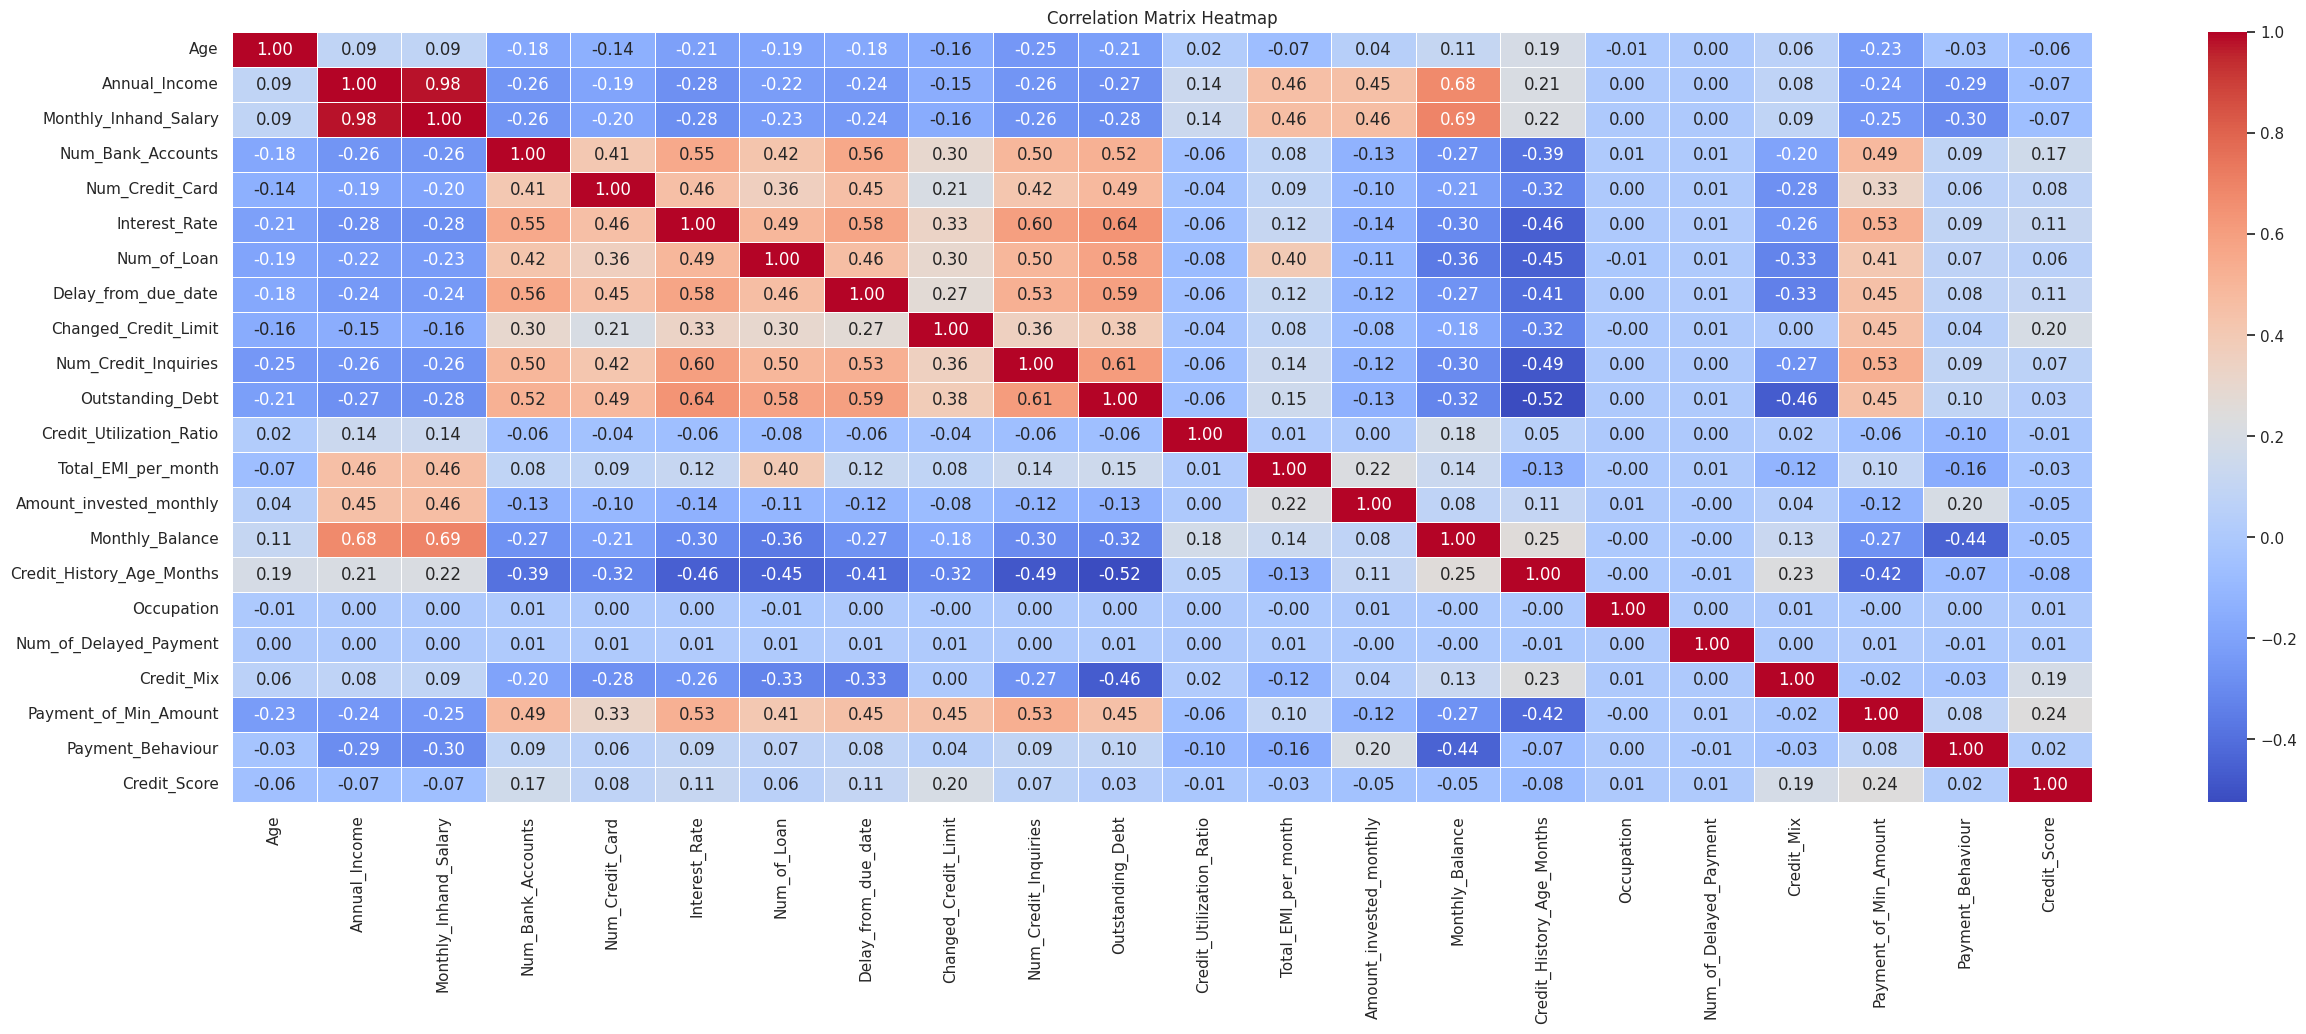

In [ ]:
numerical_columns = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numerical_columns.corr()
plt.figure(figsize=(30, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

Most related is Payment_of_Min_Amount(0.24).Suggests that paying the minimum amount due positively impacts credit scores.
next is Changed_Credit_Limit is 0.19 correlated.
least are Occupation (0.005) and Num_of_Delayed_Payment(0.006).

In [ ]:
sorted_features = corr_matrix['Credit_Score'].abs().sort_values(ascending=False)
# 5 most and least correlated features with the absolute values of their correlation
print("5 Most Correlated Features:")
print(sorted_features.head(6)[1:])
print("\n5 Least Correlated Features:")
print(sorted_features.tail(5))

5 Most Correlated Features:
Payment_of_Min_Amount    0.243145
Changed_Credit_Limit     0.198943
Credit_Mix               0.187730
Num_Bank_Accounts        0.165749
Interest_Rate            0.113221
Name: Credit_Score, dtype: float64

5 Least Correlated Features:
Total_EMI_per_month         0.028802
Payment_Behaviour           0.020117
Credit_Utilization_Ratio    0.013055
Num_of_Delayed_Payment      0.006750
Occupation                  0.005347
Name: Credit_Score, dtype: float64


**SPLITTING X AND y VALUES**

In [ ]:
X=df.drop('Credit_Score',axis=1)
X

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Changed_Credit_Limit,Num_Credit_Inquiries,...,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_History_Age_Months,Occupation,Num_of_Delayed_Payment,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Delayed_Payment_Binned
0,23,19114.12,1824.843333,3,4.0,4,4,5,11.27,4.0,...,49.574949,80.415295,312.494089,265,13,7,2,0,2,"(-4.397, 732.833]"
1,23,19114.12,1592.843333,3,4.0,4,4,5,11.27,4.0,...,49.574949,118.280222,284.629162,17,13,19,1,0,3,"(-4.397, 732.833]"
2,23,19114.12,1592.843333,3,4.0,4,4,5,6.27,4.0,...,49.574949,199.458074,223.451310,268,13,4,1,0,5,"(-4.397, 732.833]"
3,23,19114.12,1824.843333,3,4.0,4,4,6,11.27,4.0,...,49.574949,44.891546,341.489231,269,13,19,1,0,1,"(-4.397, 732.833]"
4,23,19114.12,1592.843333,3,4.0,4,4,8,9.27,4.0,...,49.574949,62.430172,340.479212,270,13,4,1,0,5,"(-4.397, 732.833]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97219,25,39628.99,3359.415833,4,6.0,7,2,23,11.50,3.0,...,35.104023,60.971333,781.624629,359,9,7,2,0,0,"(-4.397, 732.833]"
97220,25,39628.99,3359.415833,4,6.0,7,2,18,11.50,3.0,...,35.104023,54.185950,781.624629,359,9,7,2,0,1,"(-4.397, 732.833]"
97221,25,39628.99,3359.415833,4,6.0,29,2,27,11.50,3.0,...,35.104023,44.891546,781.624629,359,9,6,1,0,0,"(-4.397, 732.833]"
97222,25,39628.99,3359.415833,4,6.0,7,2,20,11.50,3.0,...,35.104023,251.672582,781.624629,359,9,19,1,0,3,"(-4.397, 732.833]"


In [ ]:
y=df['Credit_Score']
y

,Credit_Score
0,0
1,0
2,0
3,0
4,0
...,...
97219,1
97220,1
97221,1
97222,2


**FEATURE SELECTION**

In [ ]:
for col in X.columns:
    if X[col].dtype.name == 'category' or X[col].dtype.name == 'interval':
        X[col] = X[col].astype(str)

# Optionally encode string values if needed for numeric algorithms
from sklearn.preprocessing import LabelEncoder

for col in X.select_dtypes(include='object').columns:
    X[col] = LabelEncoder().fit_transform(X[col])


In [ ]:
selector = SelectKBest(score_func=f_classif, k=14)
X_n = selector.fit_transform(X, y)

X=selected_features = X.columns[selector.get_support()]
print("Top 14 Selected Features:", selected_features.tolist())


Top 14 Selected Features: ['Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Monthly_Balance', 'Credit_History_Age_Months', 'Credit_Mix', 'Payment_of_Min_Amount']


In [ ]:
X=df[X]

In [ ]:
X

,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Monthly_Balance,Credit_History_Age_Months,Credit_Mix,Payment_of_Min_Amount
0,19114.12,1824.843333,3,4.0,4,4,5,11.27,4.0,809.98,312.494089,265,2,0
1,19114.12,1592.843333,3,4.0,4,4,5,11.27,4.0,809.98,284.629162,17,1,0
2,19114.12,1592.843333,3,4.0,4,4,5,6.27,4.0,809.98,223.451310,268,1,0
3,19114.12,1824.843333,3,4.0,4,4,6,11.27,4.0,809.98,341.489231,269,1,0
4,19114.12,1592.843333,3,4.0,4,4,8,9.27,4.0,809.98,340.479212,270,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97219,39628.99,3359.415833,4,6.0,7,2,23,11.50,3.0,502.38,781.624629,359,2,0
97220,39628.99,3359.415833,4,6.0,7,2,18,11.50,3.0,502.38,781.624629,359,2,0
97221,39628.99,3359.415833,4,6.0,29,2,27,11.50,3.0,502.38,781.624629,359,1,0
97222,39628.99,3359.415833,4,6.0,7,2,20,11.50,3.0,502.38,781.624629,359,1,0


**SCALING**

In [ ]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [ ]:
X_scaled

array([[-0.91093765, -0.81981115, -1.08969894, ...,  0.59222375,
         0.79413169, -1.04846601],
       [-0.91093765, -0.90597897, -1.08969894, ..., -1.69484664,
        -0.48132771, -1.04846601],
       [-0.91093765, -0.90597897, -1.08969894, ...,  0.61988993,
        -0.48132771, -1.04846601],
       ...,
       [-0.29365478, -0.24985093, -0.65324475, ...,  1.45909721,
        -0.48132771, -1.04846601],
       [-0.29365478, -0.24985093, -0.65324475, ...,  1.45909721,
        -0.48132771, -1.04846601],
       [-0.29365478, -0.24985093, -0.65324475, ...,  1.45909721,
        -0.48132771, -1.04846601]])

**TRAIN - TEST SPLIT**

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=2)

In [ ]:
X_train.shape,y_train.shape

((68056, 14), (68056,))

In [ ]:
X_test.shape,y_test.shape

((29168, 14), (29168,))

**MODEL BUILDING**

***************** KNeighborsClassifier(n_neighbors=3) *****************
              precision    recall  f1-score   support

           0     0.5744    0.6239    0.5981      5169
           1     0.7177    0.6963    0.7068      8462
           2     0.7495    0.7402    0.7448     15537

    accuracy                         0.7068     29168
   macro avg     0.6805    0.6868    0.6832     29168
weighted avg     0.7092    0.7068    0.7078     29168

***************** SVC(kernel='poly') *****************
              precision    recall  f1-score   support

           0     0.5558    0.5105    0.5322      5169
           1     0.7484    0.5622    0.6421      8462
           2     0.6872    0.7990    0.7389     15537

    accuracy                         0.6792     29168
   macro avg     0.6638    0.6239    0.6377     29168
weighted avg     0.6817    0.6792    0.6742     29168

***************** GaussianNB() *****************
              precision    recall  f1-score   support

       

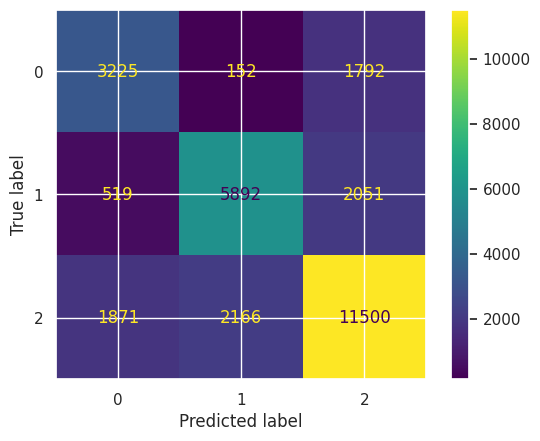

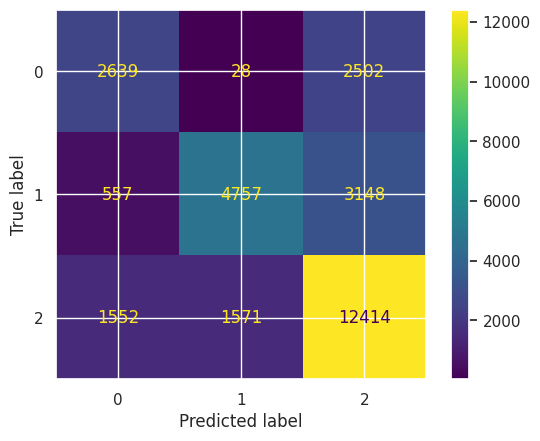

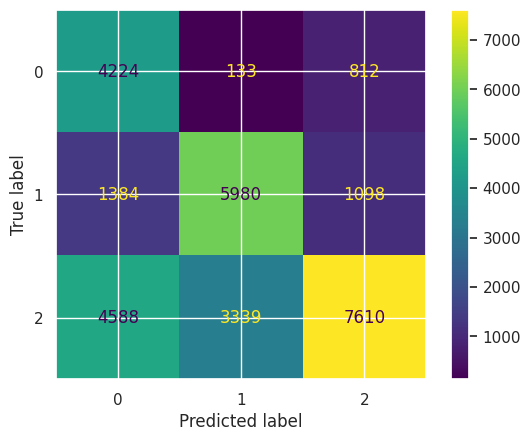

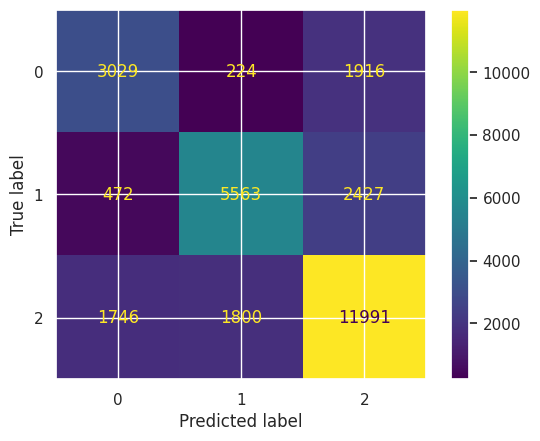

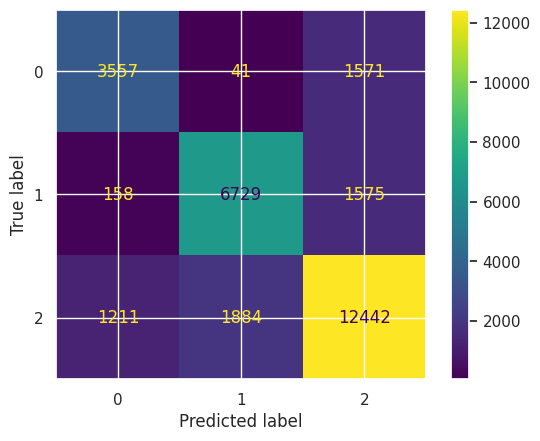

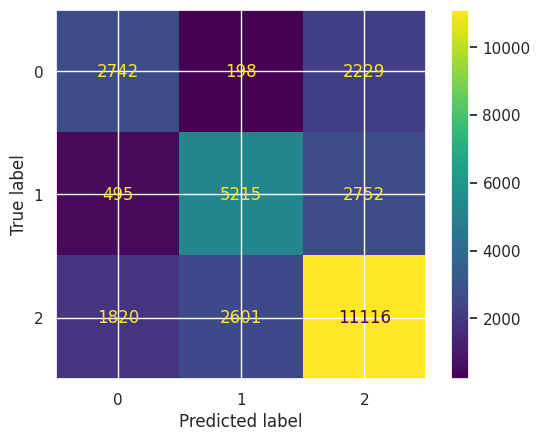

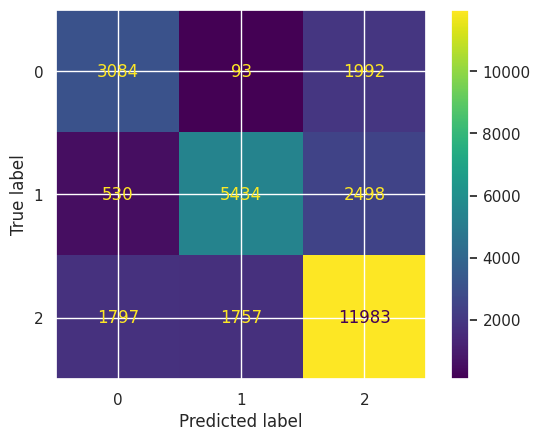

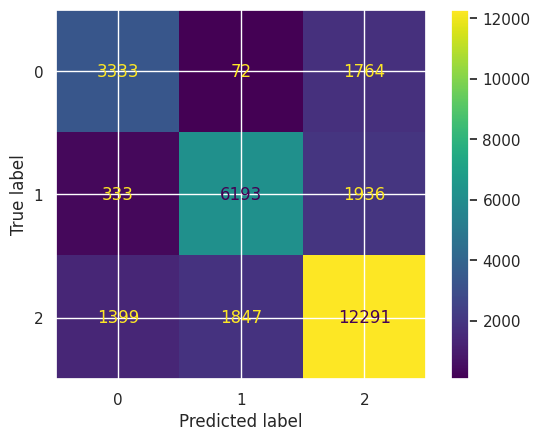

In [ ]:
knn=KNeighborsClassifier(n_neighbors=3)
svc=SVC(kernel='poly')
nb=GaussianNB()
dt=DecisionTreeClassifier(criterion='entropy',random_state=2,max_depth=9)
rf=RandomForestClassifier(criterion='entropy',random_state=2)
ab=AdaBoostClassifier()
gb=GradientBoostingClassifier()
xb=XGBClassifier()
models=[knn,svc,nb,dt,rf,ab,gb,xb]
for model in models:
  print('*****************',model,'*****************')
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print(classification_report(y_test,y_pred,digits=4))
  print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

In [ ]:
y.value_counts()

,count
Credit_Score,
2,51724
1,28205
0,17295


**OVER SAMPLING**

In [ ]:
os=SMOTE(random_state=2)
X_os,y_os=os.fit_resample(X_scaled,y)

In [ ]:
y_os.value_counts()

,count
Credit_Score,
0,51724
2,51724
1,51724


In [ ]:
X_train_os,X_test_os,y_train_os,y_test_os=train_test_split(X_os,y_os,test_size=0.3,random_state=2)

In [ ]:
X_train_os.shape,y_train_os.shape

((108620, 14), (108620,))

In [ ]:
X_test_os.shape,y_test_os.shape

((46552, 14), (46552,))

***************** KNeighborsClassifier() *****************
              precision    recall  f1-score   support

           0     0.7796    0.9431    0.8536     15428
           1     0.8069    0.8823    0.8429     15598
           2     0.8329    0.5812    0.6846     15526

    accuracy                         0.8020     46552
   macro avg     0.8065    0.8022    0.7937     46552
weighted avg     0.8065    0.8020    0.7937     46552

***************** SVC(kernel='poly') *****************
              precision    recall  f1-score   support

           0     0.6871    0.8072    0.7423     15428
           1     0.7581    0.7323    0.7450     15598
           2     0.6685    0.5753    0.6184     15526

    accuracy                         0.7047     46552
   macro avg     0.7046    0.7049    0.7019     46552
weighted avg     0.7047    0.7047    0.7019     46552

***************** GaussianNB() *****************
              precision    recall  f1-score   support

           0     0.6

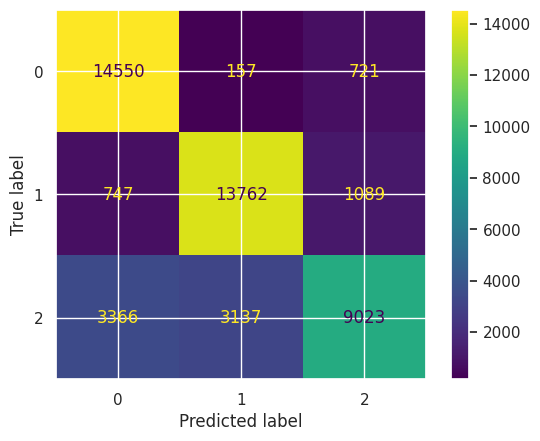

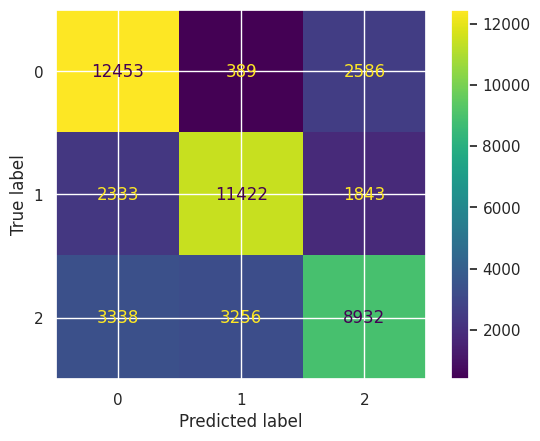

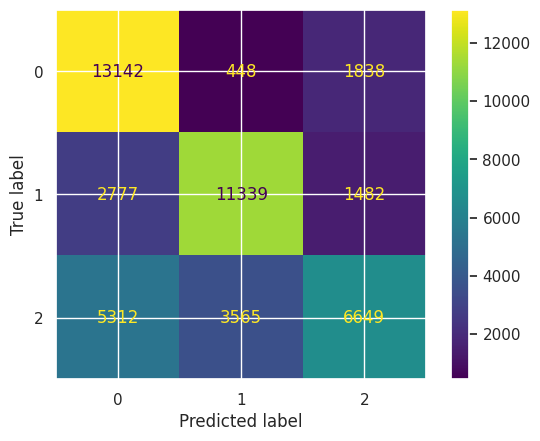

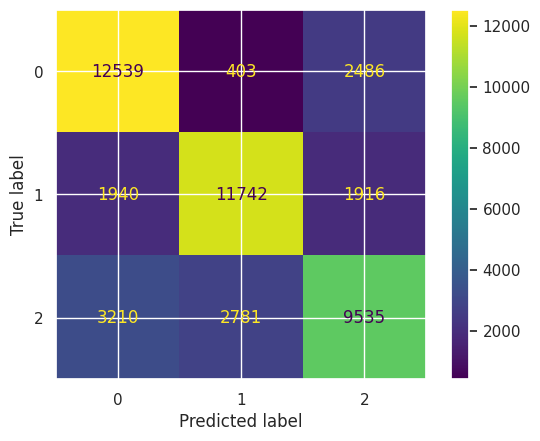

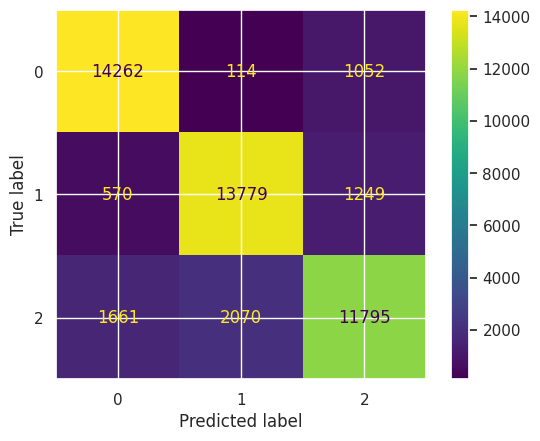

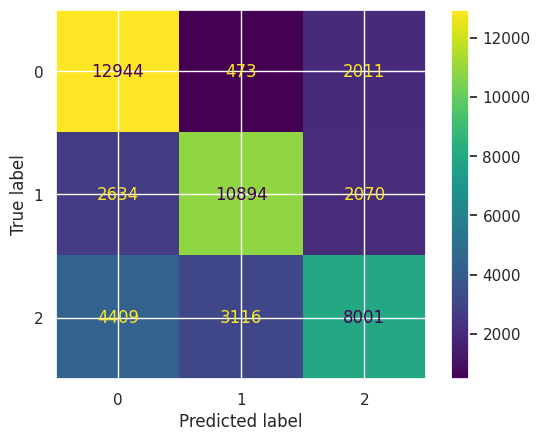

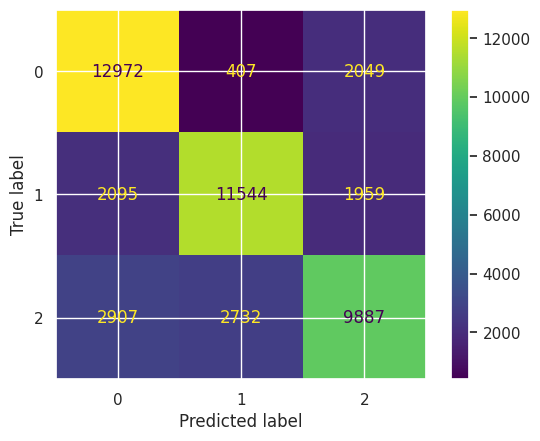

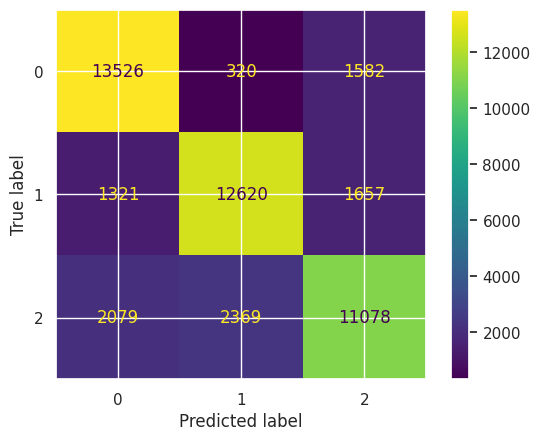

In [ ]:
knn_os=KNeighborsClassifier(n_neighbors=5)
svc_os=SVC(kernel='poly')
nb_os=GaussianNB()
dt_os=DecisionTreeClassifier(criterion='entropy',random_state=2,max_depth=9)
rf_os=RandomForestClassifier(random_state=15,criterion='entropy')
ab_os=AdaBoostClassifier()
gb_os=GradientBoostingClassifier()
xb_os=XGBClassifier()
models=[knn_os,svc_os,nb_os,dt_os,rf_os,ab_os,gb_os,xb_os]
for model in models:
  print('*****************',model,'*****************')
  model.fit(X_train_os,y_train_os)
  y_pred=model.predict(X_test_os)
  print(classification_report(y_test_os,y_pred,digits=4))
  print(ConfusionMatrixDisplay.from_predictions(y_test_os,y_pred))

In [ ]:
pickle.dump(rf_os,open('ml_model.sav','wb'))

In [ ]:
pickle.dump(scaler,open('Credit_scaler.sav','wb'))